
# **Project Name**    - Telecom Customer Churn



##### **Project Type**    - Classification
##### **Contribution**    - Individual

### Problem Statement: -
Customer churn is a crucial concern for businesses across sectors. Understanding customer behaviors,
identifying key factors contributing to churn, and predicting when customers are likely to churn are vital
for reducing revenue loss and enhancing customer retention strategies.

In [142]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [143]:
df = pd.read_csv("D:\python.practice\My_project\Customer Churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [144]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [145]:
df.tail(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [147]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [148]:
df.shape

(7043, 21)

In [149]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# EDA

In [150]:
df.drop(columns={'customerID'},axis=1, inplace=True)

In [151]:
df['TotalCharges'].replace({' ': np.nan}, inplace = True)

In [152]:
df.replace({'?': np.nan}, inplace = True)

In [153]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [154]:
df.isnull().sum()[df.isnull().sum()>0]

TotalCharges    11
dtype: int64

In [155]:
df.isnull().sum()[df.isnull().sum()>0] / df.shape[0] * 100

TotalCharges    0.156183
dtype: float64

In [156]:
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.TotalCharges = df.TotalCharges.fillna(df.TotalCharges.mean())

### Analysing Data

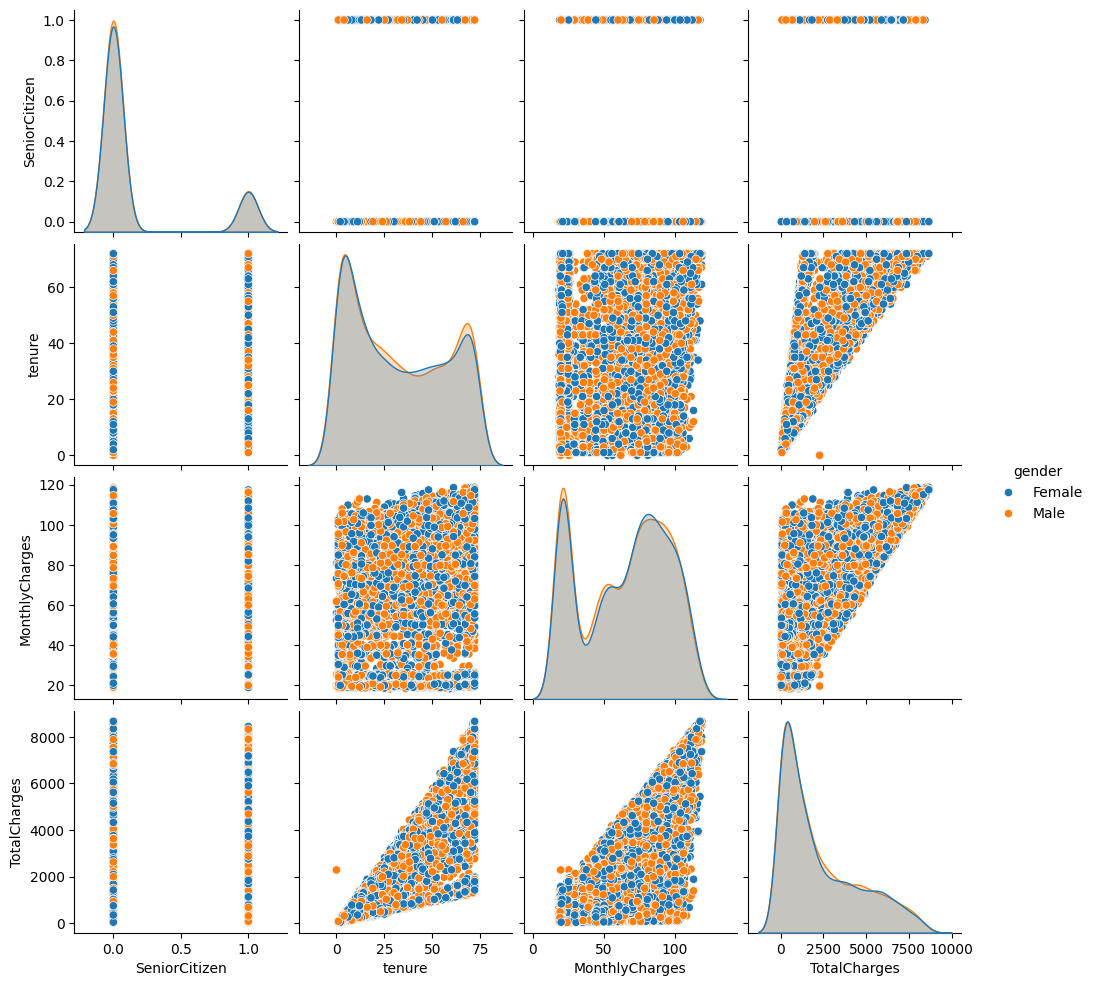

In [157]:
sns.pairplot(data = df , hue = 'gender');

Text(0.5, 1.0, 'Gender distribution')

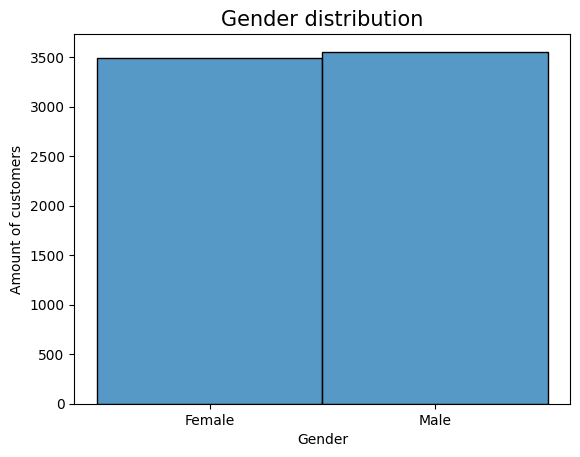

In [158]:
sns.histplot(df['gender'])
plt.xlabel("Gender")
plt.ylabel("Amount of customers")
plt.title("Gender distribution", fontsize=15)

<Axes: xlabel='gender', ylabel='MonthlyCharges'>

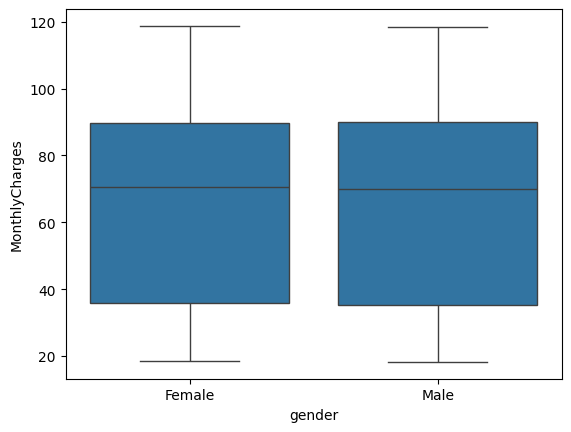

In [159]:
#To see how much each gender spends

sns.boxplot(x= 'gender', y = 'MonthlyCharges', data =df)

In [160]:
churned_dependents = df[df['Churn'] == 1]['Dependents'].value_counts()
nonchurned_dependents = df[df['Churn']==0]['Dependents'].value_counts()

In [161]:
N = 6
churned_dependents = np.random.randint(0, 5, N)  # Sample data for churned customers
nonchurned_dependents = np.random.randint(0, 5, N)  # Sample data for non-churned customers

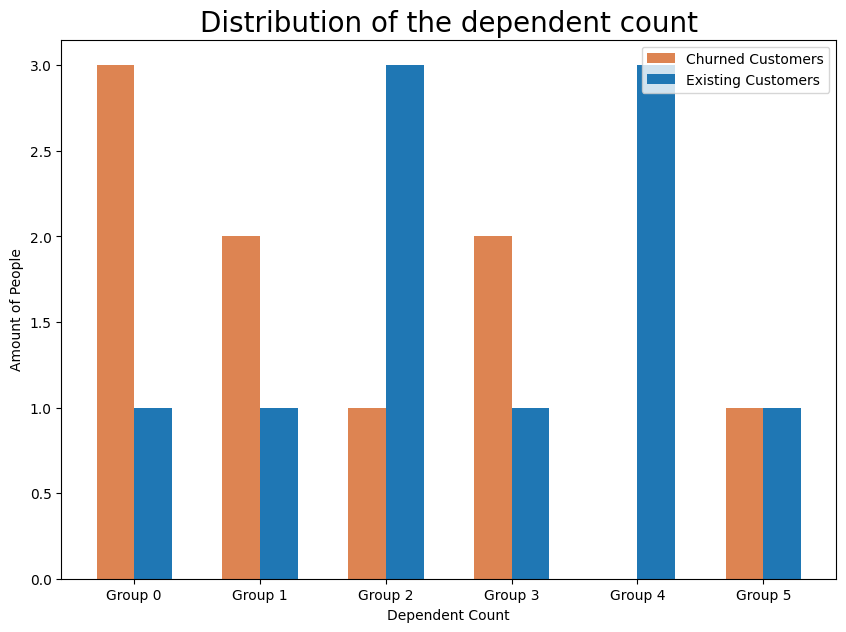

In [162]:
fig, ax = plt.subplots(figsize=(10, 7))

ind = np.arange(N)  # the x locations for the groups
width = 0.3
ax.bar(ind - width/2, churned_dependents, width, color="#DD8452", label='Churned Customers')
ax.bar(ind + width/2, nonchurned_dependents, width, label='Existing Customers')

ax.set_xlabel('Dependent Count')
ax.set_ylabel('Amount of People')
ax.set_title('Distribution of the dependent count', fontsize=20)


ax.set_xticks(ind)
ax.set_xticklabels(['Group {}'.format(i) for i in range(N)])

ax.legend();

Text(0.5, 1.0, 'Churn and Gender Counts')

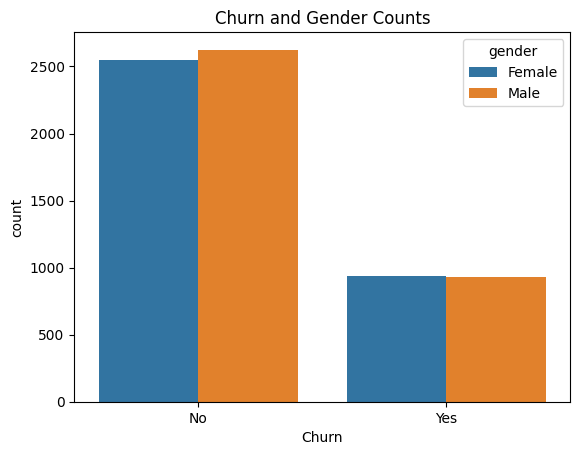

In [163]:
# plot churn and gender

sns.countplot(x='Churn', data=df, hue='gender')
plt.title('Churn and Gender Counts')

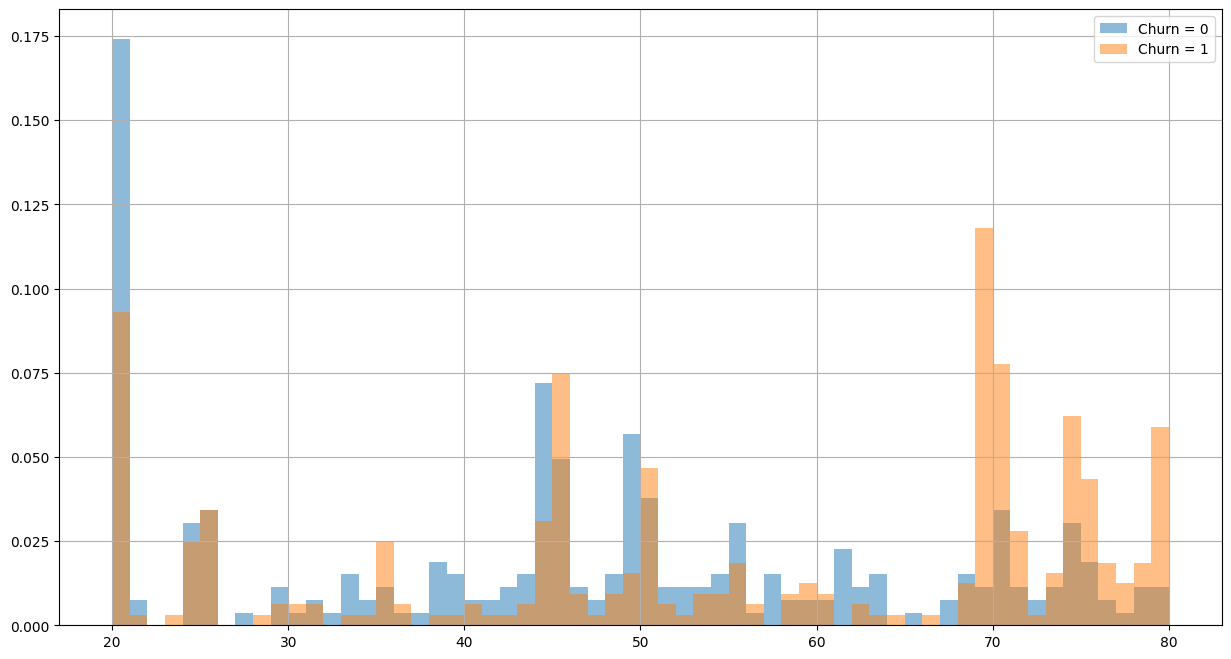

In [164]:
df.groupby('Churn').TotalCharges.hist(range=[20, 80], align = 'mid', bins=60, figsize=(15,8), density = True, alpha = 0.5)
plt.legend(['Churn = 0', 'Churn = 1'])
plt.show()

### Data Preprocessing

In [165]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors = 'coerce')

In [166]:
df.select_dtypes(include='object').columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [167]:
# checking object columns

for i in df.dtypes.index[df.dtypes == 'object']:
    a = df[i].value_counts()
    print(f'column: {i}')
    print(a)
    print("****"*8)

column: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64
********************************
column: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64
********************************
column: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
********************************
column: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
********************************
column: MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
********************************
column: InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
********************************
column: OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
********************************
column: OnlineBackup
OnlineBackup
No      

In [168]:
df['MultipleLines'].replace({'No phone service':'No'}, inplace = True)

In [169]:
list_data_change = ['OnlineSecurity','DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies' ]
for i in list_data_change:
    df[i].replace({'No internet service': 'No'}, inplace = True)

In [170]:
df.gender.replace({'Male':0,'Female':1},inplace=True)

In [171]:
df[df.select_dtypes(include='object').columns] = df[df.select_dtypes(include='object').columns].apply(le.fit_transform)

In [172]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [173]:
df.duplicated().sum() 

np.int64(22)

In [174]:
df.duplicated().sum() / df.shape[0] * 100

np.float64(0.3123668891097544)

In [175]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [176]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.001125,0.001014,-0.011081,-0.006185,0.006769,0.007730,0.001762,0.016534,0.012182,0.001511,0.008703,0.007760,0.009856,-0.000811,0.011350,-0.016304,0.013158,-0.000878,0.008763
SeniorCitizen,0.001125,1.000000,0.015553,-0.212115,0.015349,0.008909,0.142357,-0.031221,-0.039332,-0.013675,0.058797,-0.061338,0.104765,0.119584,-0.143624,0.156196,-0.037320,0.219434,0.101628,0.151619
Partner,0.001014,0.015553,1.000000,0.451659,0.377346,0.018728,0.139834,0.003667,0.141482,0.152518,0.151941,0.118311,0.122572,0.115284,0.293042,-0.015776,-0.152069,0.094301,0.316758,-0.149135
Dependents,-0.011081,-0.212115,0.451659,1.000000,0.157603,-0.001092,-0.026324,0.046608,0.079776,0.090502,0.012498,0.062039,-0.018207,-0.041441,0.241912,-0.112220,-0.038185,-0.116191,0.062640,-0.163459
tenure,-0.006185,0.015349,0.377346,0.157603,1.000000,0.009786,0.329742,-0.026847,0.325704,0.370824,0.358968,0.322694,0.277575,0.283932,0.670728,0.005053,-0.367827,0.245251,0.824164,-0.351508
PhoneService,0.006769,0.008909,0.018728,-0.001092,0.009786,1.000000,0.280935,0.387549,-0.092316,0.024439,-0.070554,-0.095761,-0.021788,-0.032179,0.003101,0.016824,-0.005304,0.248984,0.114064,0.011323
MultipleLines,0.007730,0.142357,0.139834,-0.026324,0.329742,0.280935,1.000000,0.013614,0.096583,0.119274,0.199591,0.099037,0.255579,0.257170,0.105130,0.163249,-0.168684,0.489539,0.467289,0.041958
InternetService,0.001762,-0.031221,0.003667,0.046608,-0.026847,0.387549,0.013614,1.000000,-0.392445,0.035736,-0.305763,-0.388791,-0.241122,-0.248948,0.102456,-0.137056,0.082669,-0.320525,-0.173281,-0.047366
OnlineSecurity,0.016534,-0.039332,0.141482,0.079776,0.325704,-0.092316,0.096583,-0.392445,1.000000,0.150099,0.274398,0.354110,0.174919,0.186119,0.244301,-0.004202,-0.148360,0.295548,0.411167,-0.170520
OnlineBackup,0.012182,-0.013675,0.152518,0.090502,0.370824,0.024439,0.119274,0.035736,0.150099,1.000000,0.149169,0.159987,0.109618,0.099922,0.280658,-0.012565,-0.124724,0.120391,0.375233,-0.194214


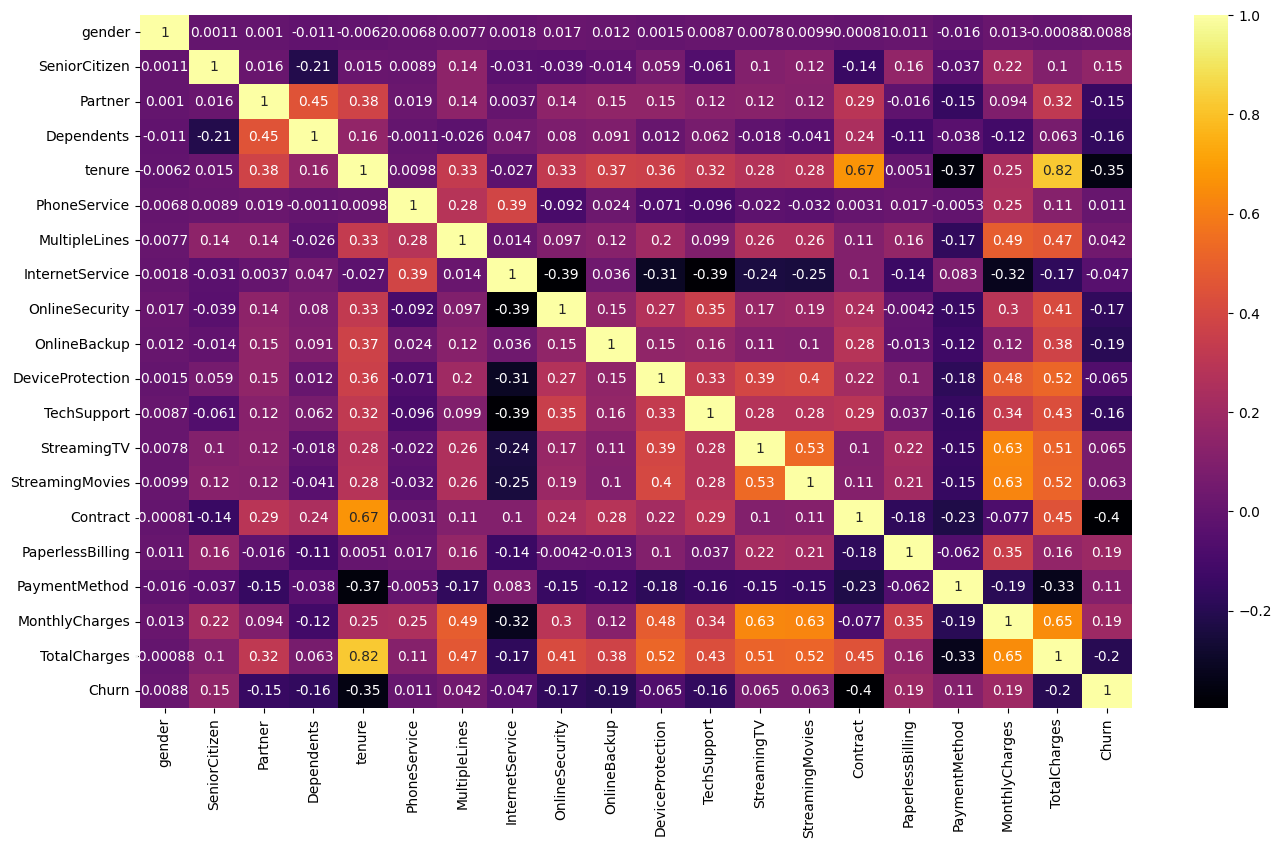

In [177]:
# finding Correlation

plt.figure(figsize =(16,9))
sns.heatmap(df.corr(), annot = True, cmap = 'inferno')
plt.show()

# Model Building

#### Splitting data into dependent and independent variables

In [178]:
df_train , df_test = train_test_split(df,test_size=0.25, random_state= 202 )

#### Handling Imbalanced Dataset

In [179]:
df.Churn.value_counts()

Churn
0    5164
1    1857
Name: count, dtype: int64

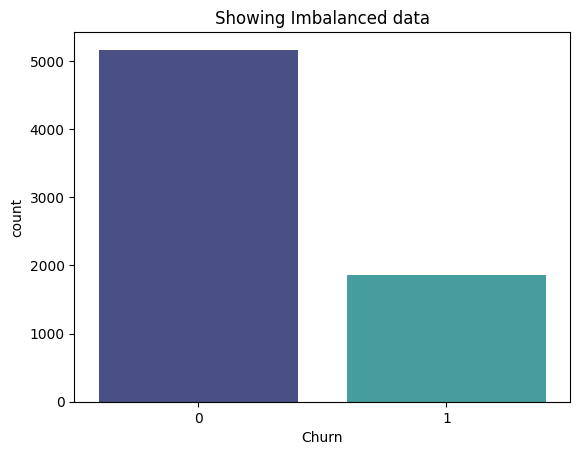

In [180]:
sns.countplot(x=df['Churn'], data=df, palette='mako')
plt.title('Showing Imbalanced data');

In [181]:
from imblearn.over_sampling import SMOTE

In [182]:
X=df.drop(['Churn'],axis=1)
y=df['Churn']

In [183]:
sm=SMOTE()
x_new, y_new = sm.fit_resample(X, y.ravel())

print("Before Using SMOTE, counts of label '1': {}".format(sum(y == 1)))
print("Before Using SMOTE, counts of label '0': {} \n".format(sum(y == 0)))
print("After Using SMOTE, counts of label '1': {}".format(sum(y_new == 1)))
print("After Using SMOTE, counts of label '0': {} \n".format(sum(y_new == 0)))
print('\n')

Before Using SMOTE, counts of label '1': 1857
Before Using SMOTE, counts of label '0': 5164 

After Using SMOTE, counts of label '1': 5164
After Using SMOTE, counts of label '0': 5164 





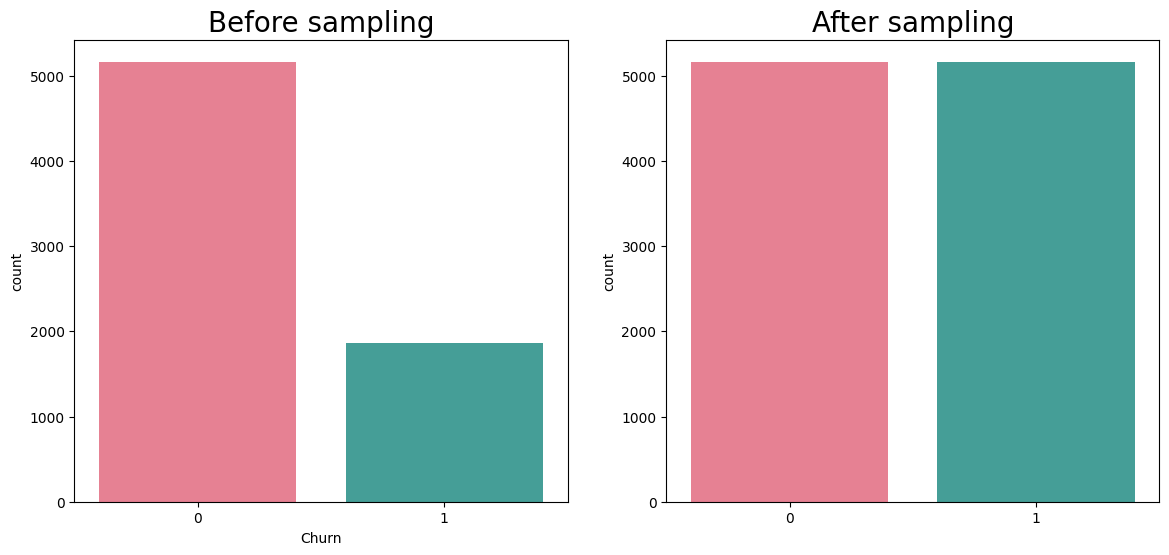

In [184]:
# Visualizing the balanced dataset

plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.countplot(x=df['Churn'], data=df, palette='husl')
plt.title('Before sampling',fontsize=20)
plt.subplot(1,2,2)
sns.countplot(x= y_new,palette='husl')
plt.title('After sampling',fontsize=20)
plt.show()

#### Spilt dataset of X variable and Y variable

In [185]:
df_train_x,df_test_x ,df_train_y, df_test_y= train_test_split(x_new,y_new, test_size= 0.20 , random_state=101)

## 1. Logistic Regression Model

In [186]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [187]:
logistic.fit(df_train_x, df_train_y)

LogisticRegression()

In [188]:
pred_test_Logistic = logistic.predict(df_test_x)
pred_test_Logistic

array([0, 1, 1, ..., 0, 0, 0])

In [189]:
confusion_matrix(df_test_y, pred_test_Logistic)

array([[784, 221],
       [175, 886]])

In [190]:
print(classification_report(df_test_y,pred_test_Logistic))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1005
           1       0.80      0.84      0.82      1061

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



In [191]:
pred_test_proba_logistic = logistic.predict_proba(df_test_x)

In [192]:
roc_Score = roc_auc_score(df_test_y, pred_test_proba_logistic[:,1]) * 100
print(roc_Score)

90.33855229038596


In [193]:
fpr , tpr ,Ther  = roc_curve(df_test_y,pred_test_proba_logistic[:,1])

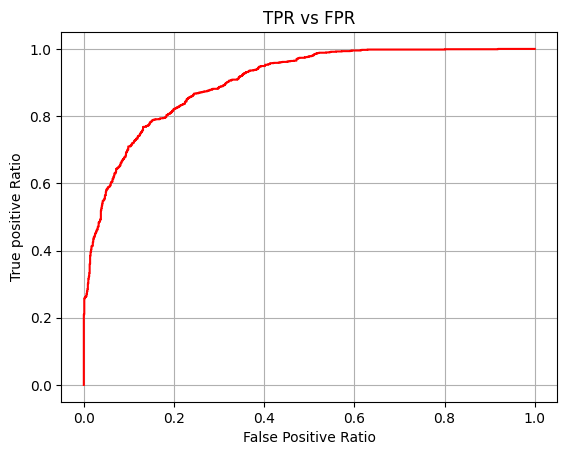

In [194]:
plt.plot(fpr,tpr,color= 'red')
plt.xlabel('False Positive Ratio')
plt.ylabel('True positive Ratio')
plt.title('TPR vs FPR')
plt.grid()

The ML model used is a Logistic Regression model. The classification report shows the precision, recall, and F1-score for each class, as well as the support (number of instances) for each class in the training set.

The precision is the ratio of true positive predictions to the total number of positive predictions. The recall is the ratio of true positive predictions to the total number of actual positive instances in the dataset. The F1-score is the harmonic mean of precision and recall.

Looking at the evaluation metric scores, we can see that the model has an **overall accuracy of 81%**, meaning that it correctly classified 81% of the instances in the training set. **The precision for class 1 is 80%**, meaning that when the model predicted a class 1 Not good, it was correct 80% of the time. **The recall for class 1 is 84%**, meaning that the model correctly identified 84% of the actual class 1 instances in the dataset. **The F1-score for class 1 is 82%**.

##  Hyperparameter Tuning for Logistic

In [224]:
from sklearn.model_selection import GridSearchCV

In [225]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(logistic, param_grid, cv=5)

In [226]:
grid_lr.fit(df_train_x , df_train_y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [227]:
# Predict on the model
y_pred_gcv = grid_lr.predict(df_test_x)

In [228]:
confusion_matrix(df_test_y , y_pred_gcv)

array([[766, 239],
       [178, 883]])

In [229]:
print(classification_report(df_test_y , y_pred_gcv))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79      1005
           1       0.79      0.83      0.81      1061

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



In [230]:
print("Best cross-validation score:", grid_lr.best_score_)
print("Best parameters:", grid_lr.best_params_)

Best cross-validation score: 0.8122700087448311
Best parameters: {'C': 10}


The best **cross-validation score achieved was 0.81**, and the best hyperparameter value for **C was found to be 10**.
Overall, it appears that the logistic regression model with the selected hyperparameters is a good fit for the dataset, achieving an **f1 score of 80**.

we did not see any improvement here.

## 2. Decision Tree Model

In [195]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier()

In [196]:
dec.fit(df_train_x,df_train_y)

DecisionTreeClassifier()

In [197]:
pred_test_Decision = dec.predict(df_test_x)
pred_test_Decision

array([1, 1, 1, ..., 1, 0, 0])

In [198]:
confusion_matrix(df_test_y, pred_test_Decision)

array([[787, 218],
       [208, 853]])

In [199]:
print(classification_report(df_test_y,pred_test_Decision))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1005
           1       0.80      0.80      0.80      1061

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



In [200]:
l1 = dec.feature_importances_
l1

array([0.01808058, 0.01263815, 0.01819058, 0.0153851 , 0.08207069,
       0.00671416, 0.01573413, 0.04051728, 0.04466553, 0.02714343,
       0.01442055, 0.03070481, 0.00904464, 0.01268442, 0.28612423,
       0.0198779 , 0.03312298, 0.151211  , 0.16166984])

In [201]:
features_important = pd.DataFrame()
features_important['Features'] = df_train_x.columns
features_important['Important'] = l1
features_important= features_important.sort_values('Important',ascending=False)
features_important

,Features,Important
14,Contract,0.286124
18,TotalCharges,0.161670
17,MonthlyCharges,0.151211
4,tenure,0.082071
8,OnlineSecurity,0.044666
7,InternetService,0.040517
16,PaymentMethod,0.033123
11,TechSupport,0.030705
9,OnlineBackup,0.027143
15,PaperlessBilling,0.019878


The ML model used is Decision Tree for classifier. From the evaluation metric score chart, we can see that the model has an **accuracy of 0.79**, which means that 79% of the predictions made by the model are correct. **The precision for class 1 is 0.80**, which means that out of all the positive predictions made for class 1, 80% of them are actually correct. **The recall for class 1 is 0.80**, which means that out of all the actual positive instances of class 1, the model correctly identified 80% of them. **The F1-score for class 1 is 0.80**, which is the harmonic mean of precision and recall, and provides an overall measure of the model's accuracy for that class.

### Hyperparameter Tuning of Decision Tree

In [232]:
search_dict = {
    'criterion': ['gini','entropy'],
    'max_depth' : [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'min_samples_split':[25,50,75,100,125]
}

In [233]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dec,search_dict)

In [234]:
grid.fit(df_train_x,df_train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20],
                         'min_samples_split': [25, 50, 75, 100, 125]})

In [235]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_split=25)

In [236]:
pred_test_grid = grid.predict(df_test_x)

In [237]:
confusion_matrix(df_test_y,pred_test_grid)

array([[828, 177],
       [196, 865]])

In [238]:
print(classification_report(df_test_y,pred_test_grid))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1005
           1       0.83      0.82      0.82      1061

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



The ML model used is Decision Tree for classifier. After using Hyperparameter Tuning of Decision Tree , we can see that the model has an **accuracy of 0.82**, which means that 82% of the predictions made by the model are correct. **The precision for class 1 is 0.83**, which means that out of all the positive predictions made for class 1, 83% of them are actually correct. **The recall for class 1 is 0.82**, which means that out of all the actual positive instances of class 1, the model correctly identified 82% of them. **The F1-score for class 1 is 0.82**, which is the harmonic mean of precision and recall, and provides an overall measure of the model's accuracy for that class.

## 3. Random Forest Model

In [239]:
from sklearn.ensemble import RandomForestClassifier
crf = RandomForestClassifier()

In [240]:
crf.fit(df_train_x, df_train_y)

RandomForestClassifier()

In [241]:
pred_test_RandomForest = crf.predict(df_test_x)
pred_test_RandomForest

array([1, 1, 1, ..., 1, 0, 0])

In [242]:
confusion_matrix(df_test_y, pred_test_RandomForest)

array([[843, 162],
       [150, 911]])

In [243]:
print(classification_report(df_test_y,pred_test_RandomForest))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1005
           1       0.85      0.86      0.85      1061

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



The ML model used is Random Forest for classifier. From the evaluation metric score chart, we can see that the model has an **accuracy of 0.85**, which means that 85% of the predictions made by the model are correct. **The precision for class 1 is 0.85**, which means that out of all the positive predictions made for class 1, 85% of them are actually correct. **The recall for class 1 is 0.86**, which means that out of all the actual positive instances of class 1, the model correctly identified 86% of them. **The F1-score for class 1 is 0.85**, which is the harmonic mean of precision and recall, and provides an overall measure of the model's accuracy for that class.

### Hyperparameter Tuning of Rnadom Forest

In [244]:
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [245]:
clsr.fit(df_train_x, df_train_y)

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [248]:
pred_test_Random_hyper = clsr.predict(df_test_x)

In [250]:
confusion_matrix(df_test_y , pred_test_Random_hyper)

array([[813, 192],
       [186, 875]])

In [249]:
print(classification_report(df_test_y , pred_test_Random_hyper))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1005
           1       0.82      0.82      0.82      1061

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



#### No, we did not see any improvement here.

# 4. Support Vector mechine (SVM)

In [251]:
from sklearn.svm import SVC
svm = SVC()

In [252]:
svm.fit(df_train_x,df_train_y)

SVC()

In [253]:
pred_test_svm = svm.predict(df_test_x)
pred_test_svm

array([0, 0, 0, ..., 1, 0, 0])

In [254]:
confusion_matrix(df_test_y, pred_test_svm)

array([[734, 271],
       [420, 641]])

In [255]:
print(classification_report(df_test_y, pred_test_svm))

              precision    recall  f1-score   support

           0       0.64      0.73      0.68      1005
           1       0.70      0.60      0.65      1061

    accuracy                           0.67      2066
   macro avg       0.67      0.67      0.66      2066
weighted avg       0.67      0.67      0.66      2066



The ML model used is Support Vector mechine (SVM) algorithm . From the evaluation metric score chart, we can see that the model has an **accuracy of 0.67**, which means that 67% of the predictions made by the model are correct. **The precision for class 1 is 0.70**, which means that out of all the positive predictions made for class 1, 70% of them are actually correct. **The recall for class 1 is 0.60**, which means that out of all the actual positive instances of class 1, the model correctly identified 60% of them. **The F1-score for class 1 is 0.65**, which is the harmonic mean of precision and recall, and provides an overall measure of the model's accuracy for that class.

## 5. KNN

In [256]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [257]:
knn.fit(df_train_x, df_train_y)

KNeighborsClassifier()

In [258]:
pred_test_knn = knn.predict(df_test_x)

In [259]:
conf_knn = confusion_matrix(df_test_y , pred_test_knn)
conf_knn

array([[726, 279],
       [160, 901]])

In [260]:
print(classification_report(df_test_y, pred_test_knn))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1005
           1       0.76      0.85      0.80      1061

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



The ML model used is K-Nearest Neighbors for classifier. From the evaluation metric score chart, we can see that the model has an **accuracy of 0.79**, which means that 79 % of the predictions made by the model are correct. **The precision for class 1 is 0.76**, which means that out of all the positive predictions made for class 1, 76% of them are actually correct. **The recall for class 1 is 0.85**, which means that out of all the actual positive instances of class 1, the model correctly identified 85 % of them. **The F1-score for class 1 is 0.80**, which is the harmonic mean of precision and recall, and provides an overall measure of the model's accuracy for that class.

# **Conclusion**

In our analysis, we initially performed EDA on all the features of our datset. We first analysed our dependent variable i.e, 'Churn' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class. we also analysed numerical variable, check out the correlation, distribution and their relationship with the dependent variable. We then later label Encoder the categorical variables.

Next we implemented 5 machine learning algorithms Logistic Regression, Random Forest , Decision Tree, KNN and Support Vector mechine . We did some hyperparameter tuning to improve our model performance.

Out of all above models Random forest Classifier gives the highest F1-score of 85% for test Set.
No overfitting is seen.
<br>

**In This the Random Forest model proves to be an excellent choice due to its ability to handle imbalanced data, provide insights into key features driving churn, and resist overfitting. Its high accuracy , high F1 score and interpretability make it a strong tool for predicting churn and guiding targeted retention strategies. Overall, Random Forest offers a balanced and reliable solution for identifying at-risk customers and improving customer retention efforts.**